# MASTER - Notebook 1
### Matteo Grazioso 884055

In [94]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

In [95]:
# Disply all columns and all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [96]:
# The fileS contain the data of the validation of tickets in the city of public transport of Venice.

# Import the data into a dataframe of a txt file 
# path = 'data/raw/validazioni.txt'                     # Period: 2022-05-13 to 2022-07-15
path = 'data/raw/esportazioneCompleta.txt'            # Period: 2023-01-23 to 2023-03-14

df = pd.read_csv(path, header=0, sep='\t')
# Save the name of the file in a variable for future use extracting the name of the file from the path
file_name = path.split('/')[-1].split('.')[0]

In [97]:
# Check the first 5 rows of the data
df.head()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,13/01/2023 00:00,40834866809772548,162,Stazione MES,12101,Bigl.Aut.75'Mestre/Lido-tsc
1,13/01/2023 00:00,42242241686217732,3625,Aeroporto MA,12106,Bigl Aer-Venezia TSC
2,13/01/2023 00:00,42242241686217476,3625,Aeroporto MA,12106,Bigl Aer-Venezia TSC
3,13/01/2023 00:00,-3604990320,5049,"Zattere ""B""",23301,Mens.Studente Rete Unica
4,13/01/2023 00:00,-2824230951,5043,"S. Toma' ""B""",23303,Abb stud. ReteUnica 12 mesi


In [98]:
# Check the last 5 rows of the data
df.tail()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
5537461,14/03/2023 23:58,-2864643315,162,Stazione MES,11209,Bigl RETE UNICA 75'
5537462,14/03/2023 23:58,-2854956628,5026,Tronchetto F,11209,Bigl RETE UNICA 75'
5537463,14/03/2023 23:59,-2850025054,384,Mestre Centr,23101,Mensile ordinario Rete Unica
5537464,14/03/2023 23:59,-2824225710,5024,"Tronchetto """,23101,Mensile ordinario Rete Unica
5537465,14/03/2023 23:59,-3604916033,5039,"Rialto ""C""",23101,Mensile ordinario Rete Unica


In [99]:
# Create a subset of the data with the first 10% of the rows and the last 10% of the rows
# df = df.iloc[:int(len(df)*0.1),:]
# df = df.append(df.iloc[-int(len(df)*0.1):,:])


## Explorative Data Analysis


In [100]:
# Dates and hour of the validation of the ticket are in the same column 'DATA_VALIDAZIONE'
# Split the column 'DATA_VALIDAZIONE' into two columns 'DATA' and 'ORA' and convert them to datetime format
df.insert(0, 'DATA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[0], format='%d/%m/%Y'))
df.insert(1, 'ORA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[1], format='%H:%M').dt.time)

# Drop the column 'DATA_VALIDAZIONE'
# df.drop('DATA_VALIDAZIONE', axis=1, inplace=True)

# Display the first 5 rows of the dataframe
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,2023-01-13,00:00:00,13/01/2023 00:00,40834866809772548,162,Stazione MES,12101,Bigl.Aut.75'Mestre/Lido-tsc
1,2023-01-13,00:00:00,13/01/2023 00:00,42242241686217732,3625,Aeroporto MA,12106,Bigl Aer-Venezia TSC
2,2023-01-13,00:00:00,13/01/2023 00:00,42242241686217476,3625,Aeroporto MA,12106,Bigl Aer-Venezia TSC
3,2023-01-13,00:00:00,13/01/2023 00:00,-3604990320,5049,"Zattere ""B""",23301,Mens.Studente Rete Unica
4,2023-01-13,00:00:00,13/01/2023 00:00,-2824230951,5043,"S. Toma' ""B""",23303,Abb stud. ReteUnica 12 mesi


In [101]:
# Set the format of the timestamp
df['DATA_VALIDAZIONE'] = pd.to_datetime(df['DATA_VALIDAZIONE'], format='%d/%m/%Y %H:%M')

In [102]:
# Print the date of the first and last validation using both data and hour
print('First validation: ', df['DATA'].min(), df['ORA'].min())
print('Last validation: ', df['DATA'].max(), df['ORA'].max())

# Print the number of Serial numbers
print('Number of Serial numbers: ', df['SERIALE'].nunique())

# Print the number of validation (rows)
print('Number of validation: ', df.shape[0])

# Print the number of tickets
print('Number of tickets: ', df['DESCRIZIONE_TITOLO'].nunique())
# Print the number of titolo
print('Number of titolo: ', df['TITOLO'].nunique())
# TODO: why the number of unique TITOLO is different from the number of DESCRIZIONE_TITOLO?

# Print the number of FERMATA
print('Number of FERMATA: ', df['FERMATA'].nunique())
# Print the number of DESCRIZIONE
print('Number of DESCRIZIONE: ', df['DESCRIZIONE'].nunique())
# TODO: why the number of unique DESCRIZIONE is different from the number of FERMATA?

First validation:  2023-01-13 00:00:00 00:00:00
Last validation:  2023-03-14 00:00:00 23:59:00
Number of Serial numbers:  1349509
Number of validation:  5537466
Number of tickets:  315
Number of titolo:  316
Number of FERMATA:  1826
Number of DESCRIZIONE:  989


In [103]:
# Which is the most used ticket?
df['DESCRIZIONE_TITOLO'].value_counts().head(10)

Bigl RETE UNICA 75'             1167916
Mensile ordinario Rete Unica     753855
DailyP-Tpl19,90-C.Ve5,10         522245
75'-Tpl 8,64-ComVe0,86           449274
Bigl.Aut.75'Mestre/Lido-tsc      327816
Annuale ordinario Rete Unica     311494
48h-Tpl 29,90-ComVe5,10          278703
72h-Tpl 38,40-ComVe6,60          199789
Mens.Studente Rete Unica         123083
7gg-Tpl 48,60-ComVe16,40         108925
Name: DESCRIZIONE_TITOLO, dtype: int64

In [104]:
# Which is the most frequent validation in date and hour?
# Date and hour are in two different columns; DATA_VALIDAZIONE does not exist anymore
df.groupby(['DATA', 'ORA'])['SERIALE'].count().sort_values(ascending=False).head(10)
# TODO: #4 Re-aswer the question of the most frequent validation after cleaning operations

DATA        ORA     
2023-02-20  16:17:00    330
            17:44:00    301
            10:52:00    290
            15:23:00    288
2023-02-19  17:02:00    287
2023-02-18  16:56:00    286
2023-02-20  15:32:00    284
2023-02-18  16:11:00    283
            16:55:00    277
2023-02-20  16:16:00    276
Name: SERIALE, dtype: int64

In [105]:
# Which is the most frequent FERMATA?
df['DESCRIZIONE'].value_counts().head(10)
# TODO: #4 Re-aswer the question of the most frequent FERMATA after cleaning operations

Lido S.M.E.     386315
P.le Roma "G    361079
Rialto "C"      344344
San Marco-Sa    276783
VENEZIA         259102
Burano "C"      193367
P.le Roma "E    176712
Ferrovia "B"    175434
S. Marco-San    169498
Rialto "B"      112853
Name: DESCRIZIONE, dtype: int64

## Categories

In [106]:
# Add a new column with the code profile of the ticket
df.insert(7, "TICKET_CODE", 'TBD')

This column will be filled with the code of the ticket profile according to the ticket type and the ticket validity as follows:

**1.** One-day ticket

**2.** Two-day ticket

**3.** Three-day ticket

**4.** Weekly ticket (Seven-day ticket)

**5.** Monthly ticket

**5-STUD.** Monthly ticket for students

**5-RET.** Monthly ticket for retirees

**5-WKRS.** Monthly ticket for workers

**6.** Annual ticket

**6-STUD.** Annual ticket for students

**6-RET.** Annual ticket for retirees

**6-WKRS.** Annual ticket for workers

**7.** 75 minutes ticket

**8.** Other ticket (if it is necessary to add other types of tickets)

In [107]:
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO
0,2023-01-13,00:00:00,2023-01-13,40834866809772548,162,Stazione MES,12101,TBD,Bigl.Aut.75'Mestre/Lido-tsc
1,2023-01-13,00:00:00,2023-01-13,42242241686217732,3625,Aeroporto MA,12106,TBD,Bigl Aer-Venezia TSC
2,2023-01-13,00:00:00,2023-01-13,42242241686217476,3625,Aeroporto MA,12106,TBD,Bigl Aer-Venezia TSC
3,2023-01-13,00:00:00,2023-01-13,-3604990320,5049,"Zattere ""B""",23301,TBD,Mens.Studente Rete Unica
4,2023-01-13,00:00:00,2023-01-13,-2824230951,5043,"S. Toma' ""B""",23303,TBD,Abb stud. ReteUnica 12 mesi


In [108]:
# Create a dictionary with the ticket code and the ticket profile
dict_tickets = {'1': 'One-day ticket', '2': 'Two-day ticket', '3': 'Three-day ticket', 
                '4': 'Seven-day ticket', 
                '5': 'Monthly ticket', '5-STUD': 'Monthly ticket for students',
                '5-RET': 'Monthly ticket for retired', '5-WKRS': 'Monthly ticket for workers',
                '6': 'Annual ticket', '6-STUD': 'Annual ticket for students', '6-RET': 'Annual ticket for retired',
                '6-WKRS': 'Annual ticket for workers',
                '7': '75 minutes ticket', '8': 'Other ticket'}

# Export the dictionary to a json file
with open('data/dictionaries/dict_ticket_codes.json', 'w') as fp:
    json.dump(dict_tickets, fp)

In [109]:
# How many unique values are there in the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].nunique()

315

In [110]:
# Which are the unique values of the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].unique()

array(["Bigl.Aut.75'Mestre/Lido-tsc", 'Bigl Aer-Venezia TSC',
       'Mens.Studente Rete Unica', 'Abb stud. ReteUnica 12 mesi ',
       "75'-Tpl 8,64-ComVe0,86", "Bigl RETE UNICA 75'",
       'Mensile ordinario Rete Unica', 'Linea 17-categoria B',
       'Aeroporto-Venezia AR', 'Annuale ORDINARIO ISOLE',
       'Mensile ORDINARIO ISOLE', 'Linea 17-categoria D',
       'DailyP-Tpl19,90-C.Ve5,10', '48h-Tpl 29,90-ComVe5,10',
       'Annuale ordinario Rete Unica', 'Atvo+Actv ann.Stud.F1',
       'Annuale STUDENTE ISOLE', 'Mensile Ordinario extra',
       'Linea 17-categoria C', 'Prenotazione Veicolo ABBONATO',
       'Libera circ. RETE intera', 'Tessera di servizio ACTV',
       'Supp Mens.navigazione', "Bigl.Mestre/Lido 75' a bordo",
       'Annuale ord.res.PELLESTRINA', '72hAerAR-Tpl51,40-CVe6,60',
       'Biglietto 72 ore Roll. Venice', 'Traghetto Carta Venezia',
       'Traghetto residente LIDO', 'Mensile STUDENTE ISOLE',
       '48ore online no aerobus', 'MOBILITY ordinario Rete Unica

In [111]:
# Get the number of unique values of the column 'DESCRIZIONE_TITOLO'
num_unique_DESCRIZIONE_TITOLO = len(df['DESCRIZIONE_TITOLO'].unique())
print('The number of unique values of the column DESCRIZIONE_TITOLO is: ', num_unique_DESCRIZIONE_TITOLO)

The number of unique values of the column DESCRIZIONE_TITOLO is:  315


In [112]:
# Convert the column 'DESCRIZIONE_TITOLO' into upper case 
df['DESCRIZIONE_TITOLO'] = df['DESCRIZIONE_TITOLO'].str.upper()
# Count the number of unique values of the column 'DESCRIZIONE_TITOLO'
df['DESCRIZIONE_TITOLO'].value_counts()

BIGL RETE UNICA 75'               1167916
MENSILE ORDINARIO RETE UNICA       753855
DAILYP-TPL19,90-C.VE5,10           522245
75'-TPL 8,64-COMVE0,86             449274
BIGL.AUT.75'MESTRE/LIDO-TSC        327816
ANNUALE ORDINARIO RETE UNICA       311494
48H-TPL 29,90-COMVE5,10            278703
72H-TPL 38,40-COMVE6,60            199789
MENS.STUDENTE RETE UNICA           123083
7GG-TPL 48,60-COMVE16,40           108925
MENSILE ORDINARIO ISOLE             85577
ANNUALE ORDINARIO ISOLE             74351
ABB STUD. RETEUNICA 12 MESI         65034
BIGLIETTO 72 ORE ROLL. VENICE       62143
72ORE ONLINE NO AEROBUS             56474
ABB. RETE INTERA A20                50474
BIGL AER-VENEZIA TSC                50419
PEOPLEMOVER+BUS+TRAM 75'            45649
MOBILITY ORDINARIO RETE UNICA       45048
EXTRA TRATTA 2                      38147
TESSERA DI SERVIZIO ACTV            37209
7 DAYS ONLINE NO AEROBUS            34462
72 ORE R.VENICE ONLINE              31590
48ORE ONLINE NO AEROBUS           

### One-day tickets

In [113]:
# Which type of ticket are one-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY')]['DESCRIZIONE_TITOLO'].value_counts()

DAILYP-TPL19,90-C.VE5,10        522245
DAILY PASS VENEZIA ONLINE        17424
24HAERCS-TPL26,90-CVE5,10         4181
DAILY PASS VE. ONLINE 1MESE       1236
24HAERAR-TPL32,90-CVE5,10          486
T.FUSINA VE+ACTV 24 ORE            479
24ORE ONLINE AEROBUS CS            439
24H-24 ORE                         342
24ORE ONLINE AEROBUS AR            181
CAV -TREP + ACTV 24H                84
JESOLO + ACTV 24H                   75
24ORE ONLINE NO AEROBUS             37
24H ONLINE AEROBUS CS 1 MESE         6
ARRIVA MISTO ACTV 24H                3
Name: DESCRIZIONE_TITOLO, dtype: int64

In [114]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity 
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY'), 'TICKET_CODE'] = '1'

In [115]:
# TICKET_CODE = 1: Information about one-day tickets
print("The number of one-day tickets is: ", df[df['TICKET_CODE'] == '1'].shape[0])
print("The number of tickets for each type of one-day ticket is: ")
df[df['TICKET_CODE'] == '1']['DESCRIZIONE_TITOLO'].value_counts()

The number of one-day tickets is:  547218
The number of tickets for each type of one-day ticket is: 


DAILYP-TPL19,90-C.VE5,10        522245
DAILY PASS VENEZIA ONLINE        17424
24HAERCS-TPL26,90-CVE5,10         4181
DAILY PASS VE. ONLINE 1MESE       1236
24HAERAR-TPL32,90-CVE5,10          486
T.FUSINA VE+ACTV 24 ORE            479
24ORE ONLINE AEROBUS CS            439
24H-24 ORE                         342
24ORE ONLINE AEROBUS AR            181
CAV -TREP + ACTV 24H                84
JESOLO + ACTV 24H                   75
24ORE ONLINE NO AEROBUS             37
24H ONLINE AEROBUS CS 1 MESE         6
ARRIVA MISTO ACTV 24H                3
Name: DESCRIZIONE_TITOLO, dtype: int64

In [116]:
print("Information about the tickets with code 1 related to the serial number: ")
df[df['TICKET_CODE'] == '1'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 1 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
24H ONLINE AEROBUS CS 1 MESE,3.0,2.000000,1.732051,1.0,1.00,1.0,2.50,4.0
24H-24 ORE,141.0,2.425532,1.631100,1.0,1.00,2.0,3.00,10.0
"24HAERAR-TPL32,90-CVE5,10",113.0,4.300885,2.942560,1.0,2.00,4.0,7.00,13.0
"24HAERCS-TPL26,90-CVE5,10",939.0,4.452609,2.570673,1.0,3.00,4.0,6.00,21.0
24ORE ONLINE AEROBUS AR,41.0,4.414634,3.154169,1.0,3.00,4.0,5.00,19.0
24ORE ONLINE AEROBUS CS,86.0,5.104651,1.958565,1.0,4.00,5.0,6.00,11.0
24ORE ONLINE NO AEROBUS,13.0,2.846154,1.281025,1.0,2.00,3.0,3.00,6.0
ARRIVA MISTO ACTV 24H,2.0,1.500000,0.707107,1.0,1.25,1.5,1.75,2.0
CAV -TREP + ACTV 24H,22.0,3.818182,1.622355,2.0,2.00,4.0,4.75,7.0


### Two days tickets

In [117]:
# Which type of ticket are two-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

48H-TPL 29,90-COMVE5,10         278703
48ORE ONLINE NO AEROBUS          31472
48HAERCS-TPL36,90-CVE5,10         4735
48HAERAR-TPL42,90-CVE5,10         2881
48H ONLINE NO AEROBUS 1MESE       2486
48ORE ONLINE AEROBUS AR           1223
48ORE ONLINE AEROBUS CS           1095
48H ONLINE AEROBUS CS 1 MESE       322
48H ONLINE AEROBUS AR 1 MESE       104
Name: DESCRIZIONE_TITOLO, dtype: int64

In [118]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE'), 'TICKET_CODE'] = '2'

In [119]:
# TICKET_CODE = 2: Information about two-day tickets
print("The number of two-day tickets is: ", df[df['TICKET_CODE'] == '2'].shape[0])
print("The number of tickets for each type of two-day ticket is: ")
df[df['TICKET_CODE'] == '2']['DESCRIZIONE_TITOLO'].value_counts()

The number of two-day tickets is:  323021
The number of tickets for each type of two-day ticket is: 


48H-TPL 29,90-COMVE5,10         278703
48ORE ONLINE NO AEROBUS          31472
48HAERCS-TPL36,90-CVE5,10         4735
48HAERAR-TPL42,90-CVE5,10         2881
48H ONLINE NO AEROBUS 1MESE       2486
48ORE ONLINE AEROBUS AR           1223
48ORE ONLINE AEROBUS CS           1095
48H ONLINE AEROBUS CS 1 MESE       322
48H ONLINE AEROBUS AR 1 MESE       104
Name: DESCRIZIONE_TITOLO, dtype: int64

In [120]:
print("Information about the tickets with code 2 related to the serial number: ")
df[df['TICKET_CODE'] == '2'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 2 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
48H ONLINE AEROBUS AR 1 MESE,15.0,6.933333,3.575046,3.0,4.50,6.0,9.0,17.0
48H ONLINE AEROBUS CS 1 MESE,38.0,8.473684,3.523948,2.0,6.25,8.0,12.0,15.0
48H ONLINE NO AEROBUS 1MESE,359.0,6.924791,3.373810,1.0,5.00,7.0,9.0,19.0
"48H-TPL 29,90-COMVE5,10",41726.0,6.679361,3.574409,1.0,4.00,6.0,9.0,41.0
"48HAERAR-TPL42,90-CVE5,10",363.0,7.936639,3.602310,1.0,6.00,8.0,10.0,20.0
"48HAERCS-TPL36,90-CVE5,10",590.0,8.025424,3.705779,1.0,5.00,8.0,11.0,21.0
48ORE ONLINE AEROBUS AR,150.0,8.153333,3.333251,3.0,6.00,8.0,10.0,18.0
48ORE ONLINE AEROBUS CS,136.0,8.051471,3.754148,1.0,6.00,8.0,10.0,19.0
48ORE ONLINE NO AEROBUS,4885.0,6.442579,3.523849,1.0,4.00,6.0,9.0,32.0


### Three days tickets

In [121]:
# Which type of ticket are three-day tickets and how many are there?
# Do not consider the ticket that contains also 75
df[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

72H-TPL 38,40-COMVE6,60           199789
BIGLIETTO 72 ORE ROLL. VENICE      62143
72ORE ONLINE NO AEROBUS            56474
72 ORE R.VENICE ONLINE             31590
72HAERAR-TPL51,40-CVE6,60           9459
72 ORE R.VENICE+AEROPORTO AR        6604
72HAERCS-TPL45,40-CVE6,60           6011
72 ORE R.VENICE+AEROPORTO CS        5965
72H ONLINE NO AEROBUS 1MESE         5218
72ORE ONLINE AEROBUS AR             5011
72H R.VENICE ONLINE 1 MESE          4948
72H R.VENICE+AEROP.AR ONLINE        4242
72H RVENICE+AEROP.CS ONLINE         2601
ATVO CANOVA+ACTV 72H ONLINE         1866
72ORE ONLINE AEROBUS CS             1667
ATVOCANOVA+ACTV 72HROLL.ONLINE      1427
72H RVE+AEROP.CS ONLINE 1 MESE       927
72H ONLINE AEROBUS AR 1 MESE         903
ATVO CANOVA+ACTV 72H                 777
72H R.VE.+AER.AR ONLINE 1MESE        648
72H ONLINE AEROBUS CS 1 MESE         561
T.FUSINA VE+ACTV 72 ORE              411
Name: DESCRIZIONE_TITOLO, dtype: int64

In [122]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE'), 'TICKET_CODE'] = '3'

In [123]:
# TICKET_CODE = 3: Information about three-day tickets
print("The number of three-day tickets is: ", df[df['TICKET_CODE'] == '3'].shape[0])
print("The number of tickets for each type of three-day ticket is: ")
df[df['TICKET_CODE'] == '3']['DESCRIZIONE_TITOLO'].value_counts()

The number of three-day tickets is:  409242
The number of tickets for each type of three-day ticket is: 


72H-TPL 38,40-COMVE6,60           199789
BIGLIETTO 72 ORE ROLL. VENICE      62143
72ORE ONLINE NO AEROBUS            56474
72 ORE R.VENICE ONLINE             31590
72HAERAR-TPL51,40-CVE6,60           9459
72 ORE R.VENICE+AEROPORTO AR        6604
72HAERCS-TPL45,40-CVE6,60           6011
72 ORE R.VENICE+AEROPORTO CS        5965
72H ONLINE NO AEROBUS 1MESE         5218
72ORE ONLINE AEROBUS AR             5011
72H R.VENICE ONLINE 1 MESE          4948
72H R.VENICE+AEROP.AR ONLINE        4242
72H RVENICE+AEROP.CS ONLINE         2601
ATVO CANOVA+ACTV 72H ONLINE         1866
72ORE ONLINE AEROBUS CS             1667
ATVOCANOVA+ACTV 72HROLL.ONLINE      1427
72H RVE+AEROP.CS ONLINE 1 MESE       927
72H ONLINE AEROBUS AR 1 MESE         903
ATVO CANOVA+ACTV 72H                 777
72H R.VE.+AER.AR ONLINE 1MESE        648
72H ONLINE AEROBUS CS 1 MESE         561
T.FUSINA VE+ACTV 72 ORE              411
Name: DESCRIZIONE_TITOLO, dtype: int64

In [124]:
print("Information about the tickets with code 3 related to the serial number: ")
df[df['TICKET_CODE'] == '3'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 3 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
72 ORE R.VENICE ONLINE,3663.0,8.624079,4.572296,1.0,6.00,8.0,11.0,47.0
72 ORE R.VENICE+AEROPORTO AR,600.0,11.006667,5.128723,1.0,7.00,11.0,14.0,39.0
72 ORE R.VENICE+AEROPORTO CS,600.0,9.941667,4.176602,1.0,7.00,10.0,13.0,26.0
72H ONLINE AEROBUS AR 1 MESE,78.0,11.576923,5.041437,2.0,7.25,10.0,15.0,28.0
72H ONLINE AEROBUS CS 1 MESE,61.0,9.196721,3.771912,3.0,6.00,9.0,12.0,19.0
72H ONLINE NO AEROBUS 1MESE,531.0,9.826742,5.009436,1.0,6.00,10.0,13.0,27.0
72H R.VE.+AER.AR ONLINE 1MESE,62.0,10.451613,5.621030,1.0,6.00,11.0,14.0,24.0
72H R.VENICE ONLINE 1 MESE,597.0,8.288107,5.081953,1.0,5.00,8.0,10.0,29.0
72H R.VENICE+AEROP.AR ONLINE,393.0,10.793893,4.927615,1.0,8.00,10.0,14.0,32.0


### Seven days tickets

In [125]:
# Which type of ticket are weekly tickets and how many are there?
# Exclude the tickets that contains also 72, 75 that are three-day tickets, 17, 48h, 57 that are other types of tickets and
# 'tratt*' and 'tr' that are reserved to specific routes
df[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS')]['DESCRIZIONE_TITOLO'].value_counts()

7GG-TPL 48,60-COMVE16,40          108925
7 DAYS ONLINE NO AEROBUS           34462
7GGAERAR-TPL61,60-CVE16,40         10113
7 DAYS ONLINE AEROBUS AR            6906
7 DAYS ONLINE NO AEROBUS 1MESE      4821
7 DAYS ONLINE AEROBUS AR 1MESE      2668
7GGAERCS-TPL55,60-CVE16,40          1952
7 DAYS ONLINE AEROBUS CS             992
7 DAYS ONLINE AEROBUS CS 1MESE       420
Name: DESCRIZIONE_TITOLO, dtype: int64

In [126]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS'), 'TICKET_CODE'] = '4'

In [127]:
# TICKET_CODE = 4: Information about weekly tickets
print("The number of weekly tickets is: ", df[df['TICKET_CODE'] == '4'].shape[0])
print("The number of tickets for each type of weekly ticket is: ")
df[df['TICKET_CODE'] == '4']['DESCRIZIONE_TITOLO'].value_counts()

The number of weekly tickets is:  171259
The number of tickets for each type of weekly ticket is: 


7GG-TPL 48,60-COMVE16,40          108925
7 DAYS ONLINE NO AEROBUS           34462
7GGAERAR-TPL61,60-CVE16,40         10113
7 DAYS ONLINE AEROBUS AR            6906
7 DAYS ONLINE NO AEROBUS 1MESE      4821
7 DAYS ONLINE AEROBUS AR 1MESE      2668
7GGAERCS-TPL55,60-CVE16,40          1952
7 DAYS ONLINE AEROBUS CS             992
7 DAYS ONLINE AEROBUS CS 1MESE       420
Name: DESCRIZIONE_TITOLO, dtype: int64

In [128]:
print("Information about the tickets with code 4 related to the serial number: ")
df[df['TICKET_CODE'] == '4'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 4 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
7 DAYS ONLINE AEROBUS AR,476.0,14.508403,7.619223,1.0,10.00,14.0,19.0,65.0
7 DAYS ONLINE AEROBUS AR 1MESE,175.0,15.245714,6.096180,1.0,11.00,15.0,19.0,32.0
7 DAYS ONLINE AEROBUS CS,77.0,12.883117,7.998312,1.0,8.00,12.0,17.0,47.0
7 DAYS ONLINE AEROBUS CS 1MESE,27.0,15.555556,9.336996,3.0,9.00,11.0,26.0,31.0
7 DAYS ONLINE NO AEROBUS,2684.0,12.839791,8.234205,1.0,7.00,12.0,17.0,146.0
7 DAYS ONLINE NO AEROBUS 1MESE,327.0,14.743119,7.606589,1.0,9.00,14.0,19.0,43.0
"7GG-TPL 48,60-COMVE16,40",7782.0,13.997044,8.506889,1.0,8.00,13.0,19.0,107.0
"7GGAERAR-TPL61,60-CVE16,40",624.0,16.206731,7.786098,1.0,11.00,16.0,21.0,45.0
"7GGAERCS-TPL55,60-CVE16,40",122.0,16.000000,8.888659,1.0,9.25,16.0,21.0,53.0


### Monthly tickets

In [129]:
# Whick type of ticket are monthly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS')]['DESCRIZIONE_TITOLO'].value_counts()

MENSILE ORDINARIO RETE UNICA      753855
MENS.STUDENTE RETE UNICA          123083
MENSILE ORDINARIO ISOLE            85577
MENSILE ORDINARIO EXTRA            27239
SUPP MENS.NAVIGAZIONE              24998
MENSILE ORD. RES. PELLESTRINA       9645
MENSILE STUDENTE ISOLE              6614
MENSILE STUDENTE EXTRA              4810
ATVO+ACTV MENS.LAV.F1               4562
ATVO+ACTV MENS.STUD.F1              2967
ATVO+ACTV MENS.LAV.F2               2679
ABB. MENSILE CHIOGGIA               2118
ATVO+ACTV MENS.STUD.F2              2041
ATVO+ACTV MENS.ORD.F1               1902
MENSILE STUD. PELLESTRINA           1221
ABBONAMENTO 30 GG.PEOPLEMOVER        934
ABB MENSILE PEOPLEMOVER              612
SUPP MENS.AUTOMOBILISTICO            607
ATVO+ACTV MENS.ORD.F2                522
ABB. STUDENTE MENS. CHIOGGIA         477
ATVO+ACTV MENS.20%.F1                250
ATVO+ACTV MENS.20%.F2                202
MENS. COSE ANIMALI RETE INTERA       111
ATVO+ACTV MENS.ORD.F3                109
MENSILE PARK+RET

In [130]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS'), 'TICKET_CODE'] = '5'

In [131]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '5-STUD' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD')), 'TICKET_CODE'] = '5-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '5-WKRS' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV')), 'TICKET_CODE'] = '5-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '5-RET' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '5-RET'

In [132]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the DDRG 1201-1297/2022 tickets are monthly tickets for blind people

# Which type of ticket are yearly tickets for blind people and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022')]['DESCRIZIONE_TITOLO'].value_counts()

DDGR1201-1297/2022 R. UNICA    5
DDGR1201-1297/2022 EXTRA       2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [133]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022'), 'TICKET_CODE'] = '5'

In [134]:
# TICKET_CODE = 5: Information about monthly tickets
print("The number of monthly tickets is: ", df[df['TICKET_CODE'] == '5'].shape[0])
print("The number of monthly tickets for students is: ", df[df['TICKET_CODE'] == '5-STUD'].shape[0])
print("The number of monthly tickets for workers is: ", df[df['TICKET_CODE'] == '5-WKRS'].shape[0])
print("The number of monthly tickets for retired people is: ", df[df['TICKET_CODE'] == '5-RET'].shape[0])

print("The number of tickets for each type of monthly ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of monthly tickets is:  909012
The number of monthly tickets for students is:  141332
The number of monthly tickets for workers is:  7273
The number of monthly tickets for retired people is:  0
The number of tickets for each type of monthly ticket (including the subtypes) is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
5            MENSILE ORDINARIO RETE UNICA      753855
             MENSILE ORDINARIO ISOLE            85577
             MENSILE ORDINARIO EXTRA            27239
             SUPP MENS.NAVIGAZIONE              24998
             MENSILE ORD. RES. PELLESTRINA       9645
             ABB. MENSILE CHIOGGIA               2118
             ATVO+ACTV MENS.ORD.F1               1902
             ABBONAMENTO 30 GG.PEOPLEMOVER        934
             ABB MENSILE PEOPLEMOVER              612
             SUPP MENS.AUTOMOBILISTICO            607
             ATVO+ACTV MENS.ORD.F2                522
             ATVO+ACTV MENS.20%.F1                250
             ATVO+ACTV MENS.20%.F2                202
             MENS. COSE ANIMALI RETE INTERA       111
             ATVO+ACTV MENS.ORD.F3                109
             MENSILE PARK+RETE INTERA             106
             ATVO+ACTV MENS.20%.F3                 67
             MENS. COSE ANIMALI RETE U

In [135]:
print("Information about the tickets with code 5 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 5 (including the subtypes) related to the serial number: 


count       mean        std  \
TICKET_CODE DESCRIZIONE_TITOLO                                              
5           ABB MENSILE PEOPLEMOVER            12.0  51.000000  23.916521   
            ABB. MENSILE CHIOGGIA             163.0  12.993865  15.593009   
            ABBONAMENTO 30 GG.PEOPLEMOVER      81.0  11.530864  13.244892   
            ARRIVA AEROPORTO O.MENS             3.0  15.333333  11.590226   
            ATVO+ACTV MENS.20%.F1               8.0  31.250000  42.005952   
            ATVO+ACTV MENS.20%.F2               7.0  28.857143  30.975413   
            ATVO+ACTV MENS.20%.F3               3.0  22.333333  29.365513   
            ATVO+ACTV MENS.5%.F2                1.0  27.000000        NaN   
            ATVO+ACTV MENS.ORD.F1              46.0  41.347826  34.092826   
            ATVO+ACTV MENS.ORD.F2              11.0  47.454545  35.103742   
            ATVO+ACTV MENS.ORD.F3               2.0  54.500000  13.435029   
            DDGR1201-1297/2022 EXTRA            1.0   2.000000        NaN   
            DDGR1201-1297/2022 R. UNICA         5.0   1.000000   0.000000   
            MENS. COSE ANIMALI RETE INTERA     17.0   6.529412  11.801047   
            MENS. COSE ANIMALI RETE UNICA       5.0  12.200000  10.986355   
            MENSILE ORD. RES. PELLESTRINA     905.0  10.657459  13.825629   
            MENSILE ORDINARIO EXTRA          2278.0  11.957419  20.620575   
            MENSILE ORDINARIO ISOLE          4288.0  19.957323  23.656477   
            MENSILE ORDINARIO RETE UNICA    31806.0  23.701660  27.568725   
            MENSILE PARK+RETE INTERA            6.0  17.666667  21.341665   
            SUPP MENS.AUTOMOBILISTICO          67.0   9.059701  15.227448   
            SUPP MENS.NAVIGAZIONE             872.0  28.667431  25.505128   
            SUPP MENS.URBANO CHIOGGIA           6.0   1.500000   0.836660   
            SUPP MENSILE PEOPLEMOVER            2.0   4.000000   4.242641   
5-STUD      ABB. STUDENTE MENS. CHIOGGIA       73.0   6.534247  12.886343   
            ATVO+ACTV MENS.STUD.F1            100.0  29.670000  28.253561   
            ATVO+ACTV MENS.STUD.F2             63.0  32.396825  24.172458   
            ATVO+ACTV MENS.STUD.F3              5.0  19.200000  18.322118   
            MENS. STUDENTE BUS LIDO            11.0   2.090909   1.758098   
            MENS.STUDENTE RETE UNICA         8949.0  13.753827  19.026200   
            MENSILE STUD. PELLESTRINA         144.0   8.479167  12.034896   
            MENSILE STUDENTE EXTRA           1179.0   4.079729   7.479599   
            MENSILE STUDENTE ISOLE            494.0  13.388664  18.326395   
5-WKRS      ATVO+ACTV MENS.LAV.F1             130.0  35.092308  31.207842   
            ATVO+ACTV MENS.LAV.F2              53.0  50.547170  37.013805   
            ATVO+ACTV MENS.LAV.F3               1.0  32.000000        NaN   

                                             min    25%   50%    75%    max  
TICKET_CODE DESCRIZIONE_TITOLO                                               
5           ABB MENSILE PEOPLEMOVER          2.0  38.50  59.5  65.25   81.0  
            ABB. MENSILE CHIOGGIA            1.0   3.00   8.0  18.00  104.0  
            ABBONAMENTO 30 GG.PEOPLEMOVER    1.0   1.00   3.0  20.00   45.0  
            ARRIVA AEROPORTO O.MENS          3.0  10.00  17.0  21.50   26.0  
            ATVO+ACTV MENS.20%.F1            1.0   1.00   7.0  53.75  104.0  
            ATVO+ACTV MENS.20%.F2            5.0  11.00  19.0  30.50   95.0  
            ATVO+ACTV MENS.20%.F3            2.0   5.50   9.0  32.50   56.0  
            ATVO+ACTV MENS.5%.F2            27.0  27.00  27.0  27.00   27.0  
            ATVO+ACTV MENS.ORD.F1            1.0  10.25  39.5  69.50  110.0  
            ATVO+ACTV MENS.ORD.F2            5.0  26.00  39.0  66.00  109.0  
            ATVO+ACTV MENS.ORD.F3           45.0  49.75  54.5  59.25   64.0  
            DDGR1201-1297/2022 EXTRA         2.0   2.00   2.0   2.00    2.0  
            DDGR1201-1297/2

### Yearly tickets

In [136]:
# Which type of ticket are yearly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI')]['DESCRIZIONE_TITOLO'].value_counts()

ANNUALE ORDINARIO RETE UNICA      311494
ANNUALE ORDINARIO ISOLE            74351
ABB STUD. RETEUNICA 12 MESI        65034
ANNUALE STUDENTE ISOLE              9965
ANNUALE ORD.RES.PELLESTRINA         5830
SUPP.ANNUALE NAVIGAZIONE            3583
ANNUALE ORDINARIO EXTRA             2900
ANNUALE STUDENTE EXTRA              2056
ABB.STUD.ANN.PELLESTRINA            1678
ATVO+ACTV ANN.LAV.F1                 923
ATVO+ACTV ANN.STUD.F1                817
ATVO+ACTV ANN.LAV.F2                 354
ATVO+ACTV ANN.STUD.F2                327
ABB ANNUALE PEOPLEMOVER              287
SUPP. 12 MESI STUDENTE LAGUNA        225
SUPP ANNUALE PEOPLEMOVER             132
ANNUALE CAT. D 17(UN SEMESTRE)       122
ABB STUD. 12 MESI CHIOGGIA            98
SUPP. ANNUALE AUTOMOB.                91
S.TERR+ACTV ANN STUD TR.6             88
ABB.CHIOGGIA ANNUALE                  85
ANNUALE CAT. D LINEA 11               67
S.TERR+ACTV ANN ORD TR.9              40
S.TERR+ACTV ANN STUD TR.7             32
ANNUALE ORDINARI

In [137]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI'), 'TICKET_CODE'] = '6'

In [138]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '6-STUD' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')), 'TICKET_CODE'] = '6-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '6-WKRS' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV|LAV')), 'TICKET_CODE'] = '6-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '6-RET' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '6-RET'

In [139]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the for OVER 75 are yearly tickets for free

# Which type of ticket are yearly tickets for OVER 75 and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI')]['DESCRIZIONE_TITOLO'].value_counts()

ABB. OVER75 GRATUITO           15349
ABBONAMENTO PENSIONATI ACTV     8187
ABB. OVER75 RETE UNICA 50%      5294
ABB. OVER 75 A20                1455
ABB. OVER 75 A5                    2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [140]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI'), 'TICKET_CODE'] = '6-RET'

In [141]:
# According to the page of yearly tickets available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/abbonamento-annuale-0), the bus pass for students has a validity of 12 months 

# Which type of ticket are yearly tickets for students and how many are there?
# Exclude the tickets that have already the field TICKET_CODE populated with 5-STUD or 6-STUD
df[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD']))]['DESCRIZIONE_TITOLO'].value_counts()

STUD. RETE INTERA  FAMILIARE    1938
S.TERRR+ACTV STUDENTE TR.6        82
S.TERR+ACTV STUDENTE TR.2         36
S.TERR+ACTV STUDENTE TR.7         25
STUDENTE EXTRA FAMILIARE          25
S.TERR+ACTV STUDENTE TR.5         13
STUDENTE CHIOGGIA FAMILIARE        7
S.TERR+ACTV STUDENTE TR.3          5
MOBILITY STUDENTE RETEUNICA        5
S.TERR+ACTV STUDENTE TR.8          2
S.TERR+ACTV STUDENTE TR.9          2
S.TERR+ACTV STUDENTE TR.4          2
Name: DESCRIZIONE_TITOLO, dtype: int64

In [142]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD'])), 'TICKET_CODE'] = '6-STUD'

In [143]:
# TICKET_CODE = 6: Information about annual tickets
print("The number of annual tickets is: ", df[df['TICKET_CODE'] == '6'].shape[0])
print("The number of annual tickets for students is: ", df[df['TICKET_CODE'] == '6-STUD'].shape[0])
print("The number of annual tickets for workers is: ", df[df['TICKET_CODE'] == '6-WKRS'].shape[0])
print("The number of annual tickets for retired people is: ", df[df['TICKET_CODE'] == '6-RET'].shape[0])

print("The number of tickets for each type of annual ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of annual tickets is:  399027
The number of annual tickets for students is:  82497
The number of annual tickets for workers is:  1277
The number of annual tickets for retired people is:  30287
The number of tickets for each type of annual ticket (including the subtypes) is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
6            ANNUALE ORDINARIO RETE UNICA      311494
             ANNUALE ORDINARIO ISOLE            74351
             ANNUALE ORD.RES.PELLESTRINA         5830
             SUPP.ANNUALE NAVIGAZIONE            3583
             ANNUALE ORDINARIO EXTRA             2900
             ABB ANNUALE PEOPLEMOVER              287
             SUPP ANNUALE PEOPLEMOVER             132
             ANNUALE CAT. D 17(UN SEMESTRE)       122
             SUPP. ANNUALE AUTOMOB.                91
             ABB.CHIOGGIA ANNUALE                  85
             ANNUALE CAT. D LINEA 11               67
             S.TERR+ACTV ANN ORD TR.9              40
             ANNUALE ORDINARIO BUS LIDO            13
             S.TERR+ACTV ANN ORD TR.2              11
             S.TERR+ACTV ANN ORD TR.6               8
             S.TERR+ACTV ANN ORD TR.8               7
             S.TERR+ACTV ANN ORD TR.7               4
             ANNUALE PARK+RETE INTERA 

In [144]:
print("Information about the tickets with code 6 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 6 (including the subtypes) related to the serial number: 


count        mean        std  \
TICKET_CODE DESCRIZIONE_TITOLO                                               
6           ABB ANNUALE PEOPLEMOVER             6.0   47.833333  36.956280   
            ABB.CHIOGGIA ANNUALE                7.0   12.142857  15.410263   
            ANNUALE CAT. D 17(UN SEMESTRE)      1.0  122.000000        NaN   
            ANNUALE CAT. D LINEA 11             1.0   67.000000        NaN   
            ANNUALE ORD.RES.PELLESTRINA       429.0   13.589744  16.760252   
            ANNUALE ORDINARIO BUS LIDO         12.0    1.083333   0.288675   
            ANNUALE ORDINARIO EXTRA           230.0   12.608696  17.655458   
            ANNUALE ORDINARIO ISOLE          3109.0   23.914764  24.020827   
            ANNUALE ORDINARIO RETE UNICA    11762.0   26.483081  26.526202   
            ANNUALE PARK+RETE INTERA            1.0    1.000000        NaN   
            S.TERR+ACTV ANN ORD TR.2            1.0   11.000000        NaN   
            S.TERR+ACTV ANN ORD TR.3            1.0    1.000000        NaN   
            S.TERR+ACTV ANN ORD TR.6            4.0    2.000000   0.816497   
            S.TERR+ACTV ANN ORD TR.7            1.0    4.000000        NaN   
            S.TERR+ACTV ANN ORD TR.8            2.0    3.500000   2.121320   
            S.TERR+ACTV ANN ORD TR.9            2.0   20.000000   5.656854   
            SUPP ANNUALE PEOPLEMOVER            7.0   18.857143  32.017852   
            SUPP. ANNUALE AUTOMOB.              5.0   18.200000  16.724234   
            SUPP.ANNUALE NAVIGAZIONE          117.0   30.623932  37.780383   
6-RET       ABB. OVER 75 A20                  169.0    8.609467  15.270619   
            ABB. OVER 75 A5                     1.0    2.000000        NaN   
            ABB. OVER75 GRATUITO             1564.0    9.813939  16.048568   
            ABB. OVER75 RETE UNICA 50%        439.0   12.059226  15.086846   
            ABBONAMENTO PENSIONATI ACTV       834.0    9.816547  15.638508   
6-STUD      ABB STUD. 12 MESI CHIOGGIA         19.0    5.157895   5.785645   
            ABB STUD. RETEUNICA 12 MESI      5025.0   12.942090  17.474675   
            ABB STUDENTE BUS LIDO 12 MESI       5.0    1.000000   0.000000   
            ABB.STUD.ANN.PELLESTRINA          174.0    9.643678  12.063873   
            ANNUALE STUDENTE EXTRA            643.0    3.197512   5.519424   
            ANNUALE STUDENTE ISOLE            676.0   14.741124  17.600156   
            ATVO+ACTV ANN.STUD.F1              25.0   32.680000  32.158099   
            ATVO+ACTV ANN.STUD.F2              11.0   29.727273  27.295021   
            MOBILITY STUDENTE RETEUNICA         2.0    2.500000   2.121320   
            S.TERR+ACTV ANN STUD TR.2           2.0    1.500000   0.707107   
            S.TERR+ACTV ANN STUD TR.3           1.0    1.000000        NaN   
            S.TERR+ACTV ANN STUD TR.5          10.0    1.200000   0.421637   
            S.TERR+ACTV ANN STUD TR.6          12.0    7.333333  20.375267   
            S.TERR+ACTV ANN STUD TR.7          11.0    2.909091   2.427120   
            S.TERR+ACTV ANN STUD TR.8           1.0    9.000000        NaN   
            S.TERR+ACTV STUDENTE TR.2          22.0    1.636364   2.555022   
            S.TERR+ACTV STUDENTE TR.3           4.0    1.250000   0.500000   
            S.TERR+ACTV STUDENTE TR.4           2.0    1.000000   0.000000   
            S.TERR+ACTV STUDENTE TR.5           8.0    1.625000   1.060660   
            S.TERR+ACTV STUDENTE TR.7           9.0    2.777778   2.386304   
            S.TERR+ACTV STUDENTE TR.8           1.0    2.000000        NaN   
            S.TERR+ACTV STUDENTE TR.9           2.0    1.000000   0.000000   
            S.TERRR+ACTV STUDENTE TR.6         18.0    4.555556   6.279961   
            STUD. RETE INTERA  FAMILIARE      118.0   16.423729  26.215545   
            STUDENTE CHIOGGIA FAMILIARE         2.0    3.500000   3.535534   
            STUDENTE EXTRA FAMILIARE           11.0    2.272727   1.

### 75 minutes tickets

In [145]:
# Which type of ticket are 75' (75 minutes) tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN')]['DESCRIZIONE_TITOLO'].value_counts()

BIGL RETE UNICA 75'               1167916
75'-TPL 8,64-COMVE0,86             449274
BIGL.AUT.75'MESTRE/LIDO-TSC        327816
PEOPLEMOVER+BUS+TRAM 75'            45649
75'-TPL 6,64-COMVE0,86              11049
BIGL.MESTRE/LIDO 75' A BORDO         8607
ORD. NAVIGAZIONE 75' ONLINE          3509
BIGLIETTO DI BORDO CV 75'            2936
BORDO 75MIN CARTAVENEZIA             1466
NA-BIG.AUT.75' MESTRE/LIDO-CSC        528
PEOPLEMOVER+BUS+TRAM 75'CARNET        460
NA-CARNET NAV. 10 CORSE DA 75'        301
ORD. NAVIG. 75' ONLINE 1 MESE         195
NA75'-TPL 13,28-COMVE1,72             113
NA-C AUT. 10 CORSE 75' CARD           100
VENDITA A BORDO 75' CV                  9
75'-TPL 12,60-CVE2,40 ONLINE            3
Name: DESCRIZIONE_TITOLO, dtype: int64

In [146]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN'), 'TICKET_CODE'] = '7'

In [147]:
# TICKET_CODE = 7: Information about 75' (75 minutes) tickets
print("The number of 75' (75 minutes) tickets is: ", df[df['TICKET_CODE'] == '7'].shape[0])
print("The number of tickets for each type of 75' (75 minutes) ticket is: ")
df[df['TICKET_CODE'] == '7'].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of 75' (75 minutes) tickets is:  2019931
The number of tickets for each type of 75' (75 minutes) ticket is: 


TICKET_CODE  DESCRIZIONE_TITOLO            
7            BIGL RETE UNICA 75'               1167916
             75'-TPL 8,64-COMVE0,86             449274
             BIGL.AUT.75'MESTRE/LIDO-TSC        327816
             PEOPLEMOVER+BUS+TRAM 75'            45649
             75'-TPL 6,64-COMVE0,86              11049
             BIGL.MESTRE/LIDO 75' A BORDO         8607
             ORD. NAVIGAZIONE 75' ONLINE          3509
             BIGLIETTO DI BORDO CV 75'            2936
             BORDO 75MIN CARTAVENEZIA             1466
             NA-BIG.AUT.75' MESTRE/LIDO-CSC        528
             PEOPLEMOVER+BUS+TRAM 75'CARNET        460
             NA-CARNET NAV. 10 CORSE DA 75'        301
             ORD. NAVIG. 75' ONLINE 1 MESE         195
             NA75'-TPL 13,28-COMVE1,72             113
             NA-C AUT. 10 CORSE 75' CARD           100
             VENDITA A BORDO 75' CV                  9
             75'-TPL 12,60-CVE2,40 ONLINE            3
Name: DESCRIZIONE_TIT

In [148]:
print("Information about the tickets with code 7 related to the serial number: ")
df[df['TICKET_CODE'] == '7'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 7 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"75'-TPL 12,60-CVE2,40 ONLINE",3.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
"75'-TPL 6,64-COMVE0,86",10354.0,1.067124,0.348078,1.0,1.0,1.0,1.0,8.0
"75'-TPL 8,64-COMVE0,86",414505.0,1.083881,0.371727,1.0,1.0,1.0,1.0,126.0
BIGL RETE UNICA 75',167114.0,6.988738,9.324228,1.0,2.0,3.0,8.0,179.0
BIGL.AUT.75'MESTRE/LIDO-TSC,219856.0,1.491049,1.097226,1.0,1.0,1.0,2.0,25.0
BIGL.MESTRE/LIDO 75' A BORDO,8438.0,1.020028,0.143450,1.0,1.0,1.0,1.0,3.0
BIGLIETTO DI BORDO CV 75',2114.0,1.388836,1.016750,1.0,1.0,1.0,1.0,13.0
BORDO 75MIN CARTAVENEZIA,1411.0,1.038979,0.214470,1.0,1.0,1.0,1.0,3.0
NA-BIG.AUT.75' MESTRE/LIDO-CSC,365.0,1.446575,0.943759,1.0,1.0,1.0,2.0,10.0


### Other types of tickets

In [149]:
# Which type of ticket are other tickets and how many are there?
# The other tickets are the tickets that are not already classified in the previous categories
df[~df['TICKET_CODE'].isin(['1', '2', '3', '4', '5', '5-STUD', '5-WKRS', '5-RET', '6', '6-STUD', '6-WKRS', '6-RET', '7'])]['DESCRIZIONE_TITOLO'].value_counts()

ABB. RETE INTERA A20              50474
BIGL AER-VENEZIA TSC              50419
MOBILITY ORDINARIO RETE UNICA     45048
EXTRA TRATTA 2                    38147
TESSERA DI SERVIZIO ACTV          37209
LIBERA CIRC. RETE INTERA          26236
EXTRA TRATTA 3                    22071
LINEA 17-CATEGORIA C              14772
TRAGHETTO CARTA VENEZIA           13195
TITOLO CMVENEZIA                  13116
EXTRA TRATTA 4                    11671
LINEA 17-CATEGORIA B               9969
TRAGHETTO RESIDENTE BURANO         9281
EXTRA TRATTA 1                     8733
L.17-AUTO "D" OLTRE METRI 4,50     8438
LINEA 17-CATEGORIA D               8152
LIBERA CIRC. DUE RETI              7645
ARRIVA VENETO TRATTA 8-9-10        7499
BIGL RETE UNICA 100'               6367
AEROPORTO-VENEZIA AR               6051
LINEA 11-CATEGORIA C               5904
LINEA 11-CATEGORIA B               5044
EXTRA TRATTA 5                     4502
TRAGHETTO RESID. PELLESTRINA       4394
AER+BOAT-TPL16,50-C.VE1,50         4059


In [150]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[~df['TICKET_CODE'].isin(['1','2','3','4','5','5-STUD','5-WKRS','5-RET','6','6-STUD','6-WKRS','6-RET','7']), 'TICKET_CODE'] = '8'

In [151]:
# TICKET_CODE = 7b: Information about other tickets
print("The number of other tickets is: ", df[df['TICKET_CODE'] == '8'].shape[0])

The number of other tickets is:  496090


In [152]:
print("Information about the tickets with code 8 related to the serial number: ")
df[df['TICKET_CODE'] == '8'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 8 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
ABB. CHIOGGIA A20,197.0,6.598985,7.931891,1.0,1.00,3.0,8.00,49.0
ABB. CHIOGGIA A20 + ACC.,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
ABB. CHIOGGIA A5,3.0,6.000000,3.605551,3.0,4.00,5.0,7.50,10.0
ABB. EXTRA A20,223.0,14.816143,21.417920,1.0,2.00,5.0,18.00,120.0
ABB. EXTRA A5,13.0,6.153846,4.862204,1.0,1.00,5.0,10.00,15.0
ABB. IMPERSONALE RETE INTERA,10.0,24.900000,15.652121,9.0,13.25,22.5,32.75,60.0
ABB. ORDINARIO BUS. LIDO,117.0,4.341880,10.550504,1.0,1.00,2.0,3.00,89.0
ABB. RETE INTERA A20 +ACC.,7.0,10.285714,14.636875,1.0,4.00,5.0,7.50,43.0
ABB. RETE INTERA A20,3045.0,16.576026,25.076975,1.0,3.00,7.0,20.00,365.0


### Summary of the ticket profiles

In [153]:
# Print the number of tickets for each ticket profile code ordered by the code of the ticket profile; print the name of the ticket profile using the dictionary 'dict_tickets'
df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).reindex(dict_tickets.values(), fill_value=0)

One-day ticket                  547218
Two-day ticket                  323021
Three-day ticket                409242
Seven-day ticket                171259
Monthly ticket                  909012
Monthly ticket for students     141332
Monthly ticket for retired           0
Monthly ticket for workers        7273
Annual ticket                   399027
Annual ticket for students       82497
Annual ticket for retired        30287
Annual ticket for workers         1277
75 minutes ticket              2019931
Other ticket                    496090
Name: TICKET_CODE, dtype: int64

In [154]:
print("The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: ")
df.groupby('TICKET_CODE')['SERIALE'].value_counts().groupby('TICKET_CODE').describe()

The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: 


,count,mean,std,min,25%,50%,75%,max
TICKET_CODE,,,,,,,,
1,136365.0,4.012892,2.219777,1.0,2.0,4.0,5.0,74.0
2,48262.0,6.693071,3.576822,1.0,4.0,6.0,9.0,41.0
3,46891.0,8.727517,4.701423,1.0,5.0,8.0,11.0,76.0
4,12294.0,13.930291,8.364992,1.0,8.0,13.0,18.0,146.0
5,40038.0,22.703731,26.971151,1.0,3.0,12.0,33.0,542.0
5-STUD,10967.0,12.887025,18.626881,1.0,2.0,5.0,15.0,164.0
5-WKRS,183.0,39.743169,33.530610,1.0,9.0,32.0,65.0,156.0
6,15644.0,25.506712,26.009371,1.0,6.0,17.0,38.0,356.0
6-RET,2970.0,10.197643,16.036240,1.0,2.0,5.0,11.0,238.0


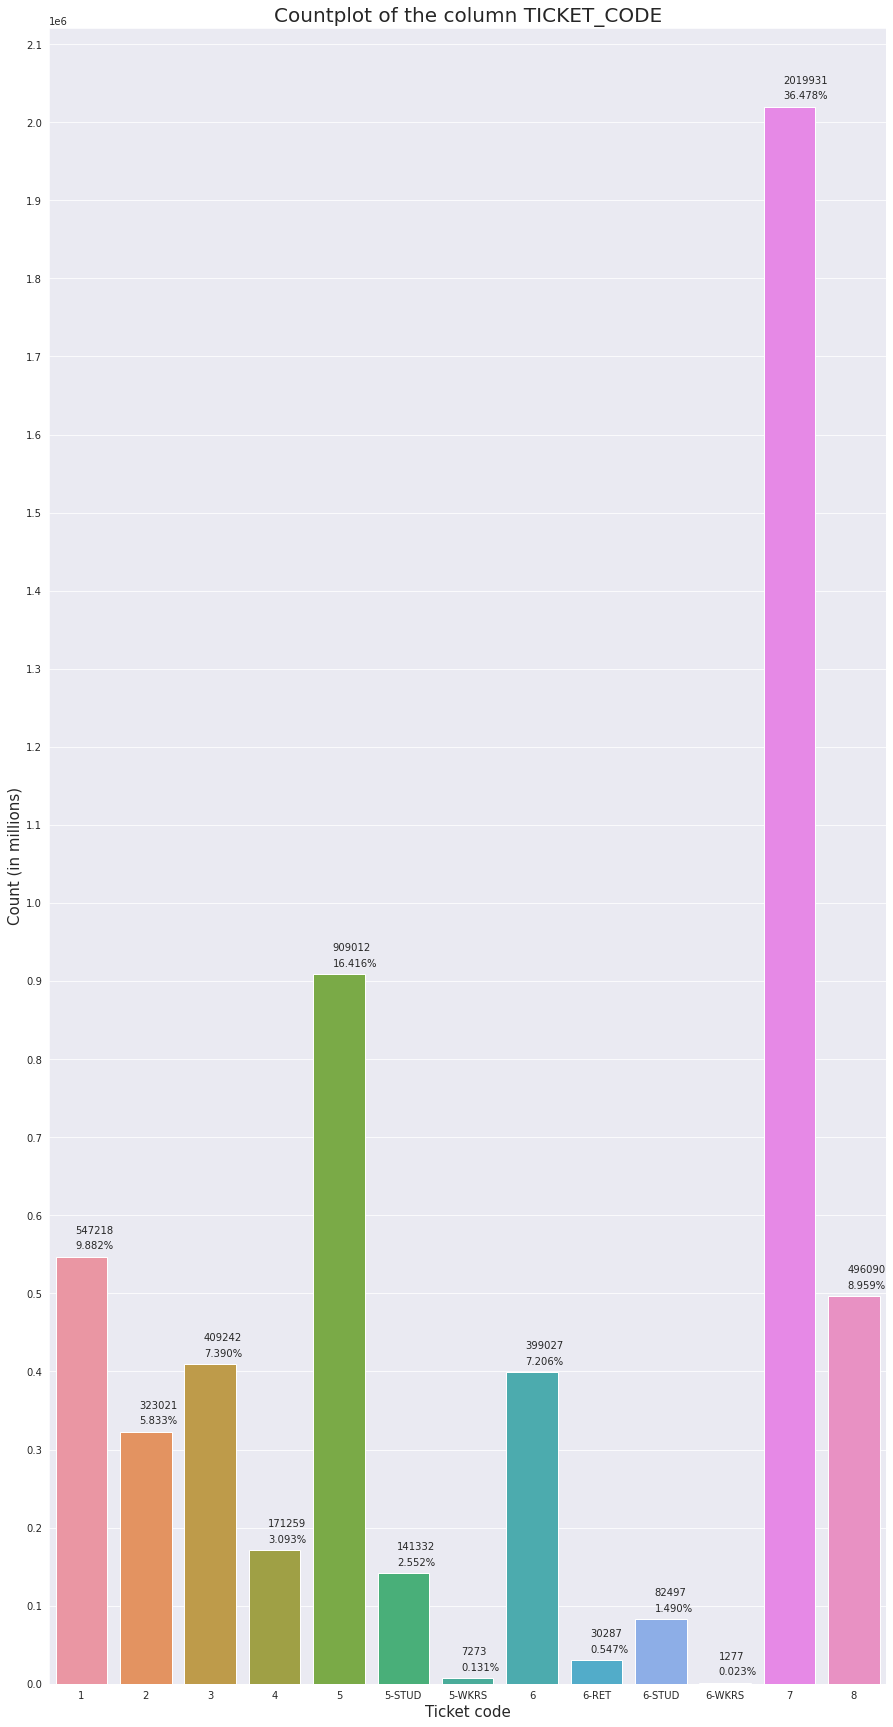

In [155]:
# Countplot of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(15,8))
# Countplot of the column 'TICKET_CODE'
sns.countplot(x='TICKET_CODE', data=df, order=df['TICKET_CODE'].value_counts().sort_index().index)
plt.title('Countplot of the column TICKET_CODE', fontsize=20)
plt.xlabel('Ticket code', fontsize=15)
plt.ylabel('Count (in millions)', fontsize=15)

# Change yticks to have a better visualization
scale = np.arange(0, max(df['TICKET_CODE'].value_counts())+100000, 100000)
plt.yticks(scale)

# Add the percentage of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+10000))

# Add the count of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+30000))

# Add a padding on the top of the plot
plt.subplots_adjust(top=3)

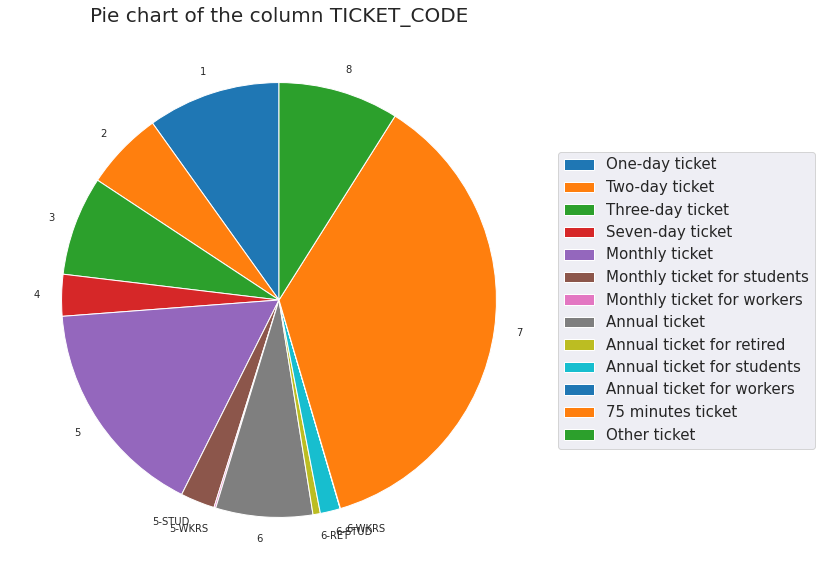

In [156]:
# Plot a pie chart of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(20,10))
df['TICKET_CODE'].value_counts().sort_index().plot.pie(startangle=90)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column TICKET_CODE', fontsize=20)
plt.ylabel('')
fig.patch.set_facecolor('white')
plt.show()

#### Delete the validation that are with TICKET_CODE = 8 (other tickets) 

In [157]:
shape_before = df.shape[0]

# Delete 8 tickets because they are not useful for the analysis 
df = df[df['TICKET_CODE'] != '8']

# Print the number of rows before and after the deletion of the 8 tickets and the difference
print('The number of rows before the deletion of the 8 tickets is: {}'.format(shape_before))
print('The number of rows after the deletion of the 8 tickets is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))

# TODO: to de-comment later

The number of rows before the deletion of the 8 tickets is: 5537466
The number of rows after the deletion of the 8 tickets is: 5041376
The difference is: 496090


## Data Cleaning

### SSimilar stops

In [158]:
# Print the number of unique values in the column 'DESCRIZIONE' that are the names of the stops
print('The number of unique values in the column DESCRIZIONE is: {}'.format(df['DESCRIZIONE'].nunique()))

The number of unique values in the column DESCRIZIONE is: 885


In [159]:
def get_common_prefix(string_list):
    """
        This function returns the common prefix of a list of strings.
        If there is no common prefix, it returns an empty string.
        :param string_list: list of strings
        :return: string that is the common prefix of the list of strings
    """
    first_prefix = string_list[0].split(" ")[0]
    # Create and empty dictionary
    prefix_dict = {}

    # Iterate over the list of strings
    for string in string_list[1:]:
        # Check if the string starts with the first prefix
        if not string.startswith(first_prefix):
            # If the string does not start with the first prefix, split the string and take the first word
            first_prefix = string.split(" ")[0]
            if string.startswith(first_prefix):
                # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
                prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
        else:
            # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
            prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
    return prefix_dict

In [160]:
# To avoid problem regarding the letters in uppercase and lowercase, convert all the letters in uppercase
df['DESCRIZIONE'] = df['DESCRIZIONE'].str.upper()

In [161]:
# Use the function get_common_prefix to find the common prefix of the strings in the column 'DESCRIZIONE' and print the result

# Crete a string list with the unique values of the column 'DESCRIZIONE'
string_list = df['DESCRIZIONE'].unique().tolist()

dict_prefix = get_common_prefix(string_list)
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

# Print the number of keys in the dictionary
print('The number of keys in the dictionary is: {}'.format(len(dict_prefix.keys())))

ZATTERE: ['ZATTERE "B"', 'ZATTERE "A"', 'ZATTERE']
S.: ['S. TOMA\' "B"', 'S. MARCO-SAN', 'S. MARCUOLA-', 'S. STAE', 'S. MARCO VAL', 'S.ELENA-STAD', 'S. MARIA DEL', 'S. SILVESTRO', 'S. ANGELO', 'S. ALVISE', 'S. GIORGIO', 'S. PIETRO DI', 'S. BASILIO', 'S. MARTA', 'S. SERVOLO', 'S. ERASMO PU', 'S. ERASMO CA', 'S. ERASMO CH', 'S. SAMUELE', 'S. MARCO (GI', 'S. LAZZARO', 'S. TOMA\' "A"', 'S. MARCO GIA']
VENEZIA: ['VENEZIA CORS', 'VENEZIA', 'VENEZIA PIAZ', 'VENEZIA RAMP']
P.LE: ['P.LE ROMA "G', 'P.LE ROMA "E', 'P.LE ROMA "A', 'P.LE ROMA "C', 'P.LE ROMA "D', 'P.LE ROMA "B', 'P.LE ROMA "F']
FERROVIA: ['FERROVIA "B"', 'FERROVIA "D"', 'FERROVIA "E"', 'FERROVIA PIO', 'FERROVIA "A"', 'FERROVIA "C"']
SAN: ['SAN MARCO CA', 'SAN MARCO SA', 'SAN MARCO-SA', "SANT'ANTONIO", 'SAN MARCO MO', "SAN DONA' MA", "SAN DONA' CE", "SAN DONA' RI", "SAN DONA' PI", 'SAN MARCO BO', "SAN DONA' PA", 'SAN MARCO MA', 'SAN LIBERALE', "SAN DONA' VA", "SAN DONA' FA", 'SAN MARCO FO', 'SANTA MARGHE', "SAN DONA' PE", 'SANTA MAR

#### Update some keys in the dictionary

In [162]:
# Rename the key 'P.le' with 'P.le Roma'
dict_prefix['P.LE ROMA'] = dict_prefix.pop('P.LE')
# Rename the key 'F.TE' with 'F.TE NOVE'
dict_prefix['F.TE NOVE'] = dict_prefix.pop('F.TE')

In [163]:
# Print the values of the dictionary with the keys 'S.' and 'San'
print('The values of the dictionary with the key S. are: {}'.format(dict_prefix['S.']))
print('The values of the dictionary with the key San are: {}'.format(dict_prefix['SAN']))

The values of the dictionary with the key S. are: ['S. TOMA\' "B"', 'S. MARCO-SAN', 'S. MARCUOLA-', 'S. STAE', 'S. MARCO VAL', 'S.ELENA-STAD', 'S. MARIA DEL', 'S. SILVESTRO', 'S. ANGELO', 'S. ALVISE', 'S. GIORGIO', 'S. PIETRO DI', 'S. BASILIO', 'S. MARTA', 'S. SERVOLO', 'S. ERASMO PU', 'S. ERASMO CA', 'S. ERASMO CH', 'S. SAMUELE', 'S. MARCO (GI', 'S. LAZZARO', 'S. TOMA\' "A"', 'S. MARCO GIA']
The values of the dictionary with the key San are: ['SAN MARCO CA', 'SAN MARCO SA', 'SAN MARCO-SA', "SANT'ANTONIO", 'SAN MARCO MO', "SAN DONA' MA", "SAN DONA' CE", "SAN DONA' RI", "SAN DONA' PI", 'SAN MARCO BO', "SAN DONA' PA", 'SAN MARCO MA', 'SAN LIBERALE', "SAN DONA' VA", "SAN DONA' FA", 'SAN MARCO FO', 'SANTA MARGHE', "SAN DONA' PE", 'SANTA MARIA ', 'SAN MARCO MU', "SAN NICOLO' ", "SAN NICOLO'", 'SAN ROCCO BR', 'SANSOVINO VE', 'SAN PIETRO B', 'SANPIETRO CA', 'SAN PIETRO P', 'SANT´ANNA S', 'SAN PIETRO C', 'SANT´ANNA V', 'SAN TROVASO', 'SANBRUSON MA', "SANT'ANGELO ", 'SANBRUSON CA', 'SANDON', 'S

##### S.Erasmo

In [164]:
# Create a new key in the dictionary with the key S.ERASMO; insert as value the list of strings that have the prefix 'S.ERASMO'
dict_prefix['S.ERASMO'] = [string for string in dict_prefix['S.'] if string.startswith('S.ERASMO')]

# Add the value 'S. Erasmo Pu' originally in the key 'San' to the key 'S.ERASMO'
dict_prefix['S.ERASMO'].append('S. ERASMO PU')

# Remove the strings that have the prefix 'S.ERASMO' from the keys 'S.' and 'San'
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S.ERASMO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. ERASMO PU')]

# Print the values of the dictionary with the key 'S.ERASMO'
print('The values of the dictionary with the key S.ERASMO are: {}'.format(dict_prefix['S.ERASMO']))

The values of the dictionary with the key S.ERASMO are: ['S. ERASMO PU']


##### San Marco

In [165]:
# Create a new key in the dictionary with the key 'San Marco'; insert as value the list of strings that have the prefix 'San Marco'
dict_prefix['SAN MARCO'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN MARCO')]


# Add the value S. MARCO (Gi', 'S. Pietro in Gu') originally in the key 'S.' to the key 'San Marco'
dict_prefix['SAN MARCO'].append('S. MARCO (GI')

# Remove the strings that have the prefix 'San Marco' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN MARCO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. MARCO (GI')]

# Print the values of the dictionary with the key 'San Marco'
print('The values of the dictionary with the key San Marco are: {}'.format(dict_prefix['SAN MARCO']))

The values of the dictionary with the key San Marco are: ['SAN MARCO CA', 'SAN MARCO SA', 'SAN MARCO-SA', 'SAN MARCO MO', 'SAN MARCO BO', 'SAN MARCO MA', 'SAN MARCO FO', 'SAN MARCO MU', 'S. MARCO (GI']


##### San Dona'

In [166]:
# Create a new key in the dictionary with the key 'San Dona'; insert as value the list of strings that have the prefix 'San Dona'
dict_prefix['SAN DONA'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN DONA')]

# Remove the strings that have the prefix 'San Dona' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN DONA')]

# Print the values of the dictionary with the key 'San Dona'
print('The values of the dictionary with the key San Dona are: {}'.format(dict_prefix['SAN DONA']))

The values of the dictionary with the key San Dona are: ["SAN DONA' MA", "SAN DONA' CE", "SAN DONA' RI", "SAN DONA' PI", "SAN DONA' PA", "SAN DONA' VA", "SAN DONA' FA", "SAN DONA' PE"]


#### San Pietro

In [167]:
# Create a new key in the dictionary with the key 'San Pietro'; insert as value the list of strings that have the word 'Pietro' in the string
dict_prefix['SAN PIETRO'] = [string for string in dict_prefix['SAN'] if 'PIETRO' in string] + [string for string in dict_prefix['S.'] if 'PIETRO' in string]

# Remove the strings that have the word 'Pietro' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if 'PIETRO' not in string]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if 'PIETRO' not in string]

# Print the values of the dictionary with the key 'San Pietro'
print('The values of the dictionary with the key San Pietro are: {}'.format(dict_prefix['SAN PIETRO']))

The values of the dictionary with the key San Pietro are: ['SAN PIETRO B', 'SANPIETRO CA', 'SAN PIETRO P', 'SAN PIETRO C', 'S. PIETRO DI']


#### Ca' Rossa

In [168]:
# Create a new key in the dictionary with the key 'Ca' Rossa'; insert as value the list of strings that have the word 'Ca' Rossa' in the string
dict_prefix['CA\' ROSSA'] = [string for string in dict_prefix['CA\''] if 'CA' in string and 'ROSSA' in string]

# Remove the strings that have the word 'Ca' Rossa' from the keys 'Ca''
dict_prefix['CA\''] = [string for string in dict_prefix['CA\''] if 'CA' not in string or 'ROSSA' not in string]

# Print the values of the dictionary with the key 'Ca Rossa'
print('The values of the dictionary with the key Ca\' Rossa are: {}'.format(dict_prefix['CA\' ROSSA']))

The values of the dictionary with the key Ca' Rossa are: ["CA' ROSSA VO", "CA' ROSSA SE", "CA' ROSSA BI", "CA' ROSSA OB"]


##### Manage the remaining values in the keys 'S.' and 'San' and others

In [169]:
# Manage the remaining values in the keys 'S.', 'San', 'Santa', 'Sant'', 'Ca'', 'Piazza', 'Piazzale', 'Stazione', 'Treviso, 'Trento', 'Incr.'
# Create a new key for each value in the keys as above and assign the value as value of the new key
# Remove the values from the keys as above

if 'S.' in dict_prefix:
    for value in dict_prefix['S.']:
        dict_prefix[value] = [value]
    dict_prefix.pop('S.')

if 'SAN' in dict_prefix:
    for value in dict_prefix['SAN']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SAN')

if 'SANTA' in dict_prefix:
    for value in dict_prefix['SANTA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SANTA')

if 'SANT\'' in dict_prefix:
    for value in dict_prefix['SANT\'']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SANT\'')

if 'CA\'' in dict_prefix:
    for value in dict_prefix['CA\'']:
        dict_prefix[value] = [value]
    dict_prefix.pop('CA\'')

if 'PIAZZA' in dict_prefix:
    for value in dict_prefix['PIAZZA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('PIAZZA')

if 'PIAZZALE' in dict_prefix:
    for value in dict_prefix['PIAZZALE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('PIAZZALE')

if 'VIA' in dict_prefix:
    for value in dict_prefix['VIA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('VIA')

if 'STAZIONE' in dict_prefix:
    for value in dict_prefix['STAZIONE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('STAZIONE')

if 'TREVISO' in dict_prefix:
    for value in dict_prefix['TREVISO']:
        dict_prefix[value] = [value]
    dict_prefix.pop('TREVISO')

if 'TRENTO' in dict_prefix:
    for value in dict_prefix['TRENTO']:
        dict_prefix[value] = [value]
    dict_prefix.pop('TRENTO')

if 'INCR.' in dict_prefix:
    for value in dict_prefix['INCR.']:
        dict_prefix[value] = [value]
    dict_prefix.pop('INCR.')

if 'DE' in dict_prefix:
    for value in dict_prefix['DE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('DE')

#### Treviso and Trento

In [170]:
# Remove the values Treviso, Trento, Trezzo and Treporti from the key 'Tre'
dict_prefix['TRE'] = [string for string in dict_prefix['TRE'] if 'TREVISO' not in string and 'TRENTO' not in string and 'TREZZO' not in string and 'TREPORTI' not in string]

# Print the values of the dictionary with the key 'Tre'
print('The values of the dictionary with the key Tre are: {}'.format(dict_prefix['TRE']))

# TODO: Correct the values of the keys 'Treviso' and 'Trento' with the correct values

The values of the dictionary with the key Tre are: ['TRE ARCHI']


#### Keys with only an item

In [171]:
# If a key as only one value, then rename the key with the value
# Use copy() to avoid RuntimeError: dictionary changed size during iteration
for key, value in dict_prefix.copy().items():
    if len(value) == 1:
        dict_prefix[value[0]] = dict_prefix.pop(key)

##### Finally, the update dictionary is

In [172]:
# Print the dictionary in the new format
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

ZATTERE: ['ZATTERE "B"', 'ZATTERE "A"', 'ZATTERE']
VENEZIA: ['VENEZIA CORS', 'VENEZIA', 'VENEZIA PIAZ', 'VENEZIA RAMP']
FERROVIA: ['FERROVIA "B"', 'FERROVIA "D"', 'FERROVIA "E"', 'FERROVIA PIO', 'FERROVIA "A"', 'FERROVIA "C"']
LIBERTA': ["LIBERTA' SAN", "LIBERTA' FIN"]
TRONCHETTO: ['TRONCHETTO F', 'TRONCHETTO "', 'TRONCHETTO M', 'TRONCHETTO T', 'TRONCHETTO V']
RIALTO: ['RIALTO "C"', 'RIALTO MERCA', 'RIALTO "D"', 'RIALTO "B"', 'RIALTO "A"']
GIARDINI: ['GIARDINI BIE', 'GIARDINI "B"', 'GIARDINI "A"']
ALTINIA: ["ALTINIA CA' ", 'ALTINIA MUNI', 'ALTINIA INDR', 'ALTINIA FAVA', 'ALTINIA SAN ', 'ALTINIA BERI', 'ALTINIA 181', 'ALTINIA FORT']
MESTRE: ['MESTRE RAMPA', 'MESTRE CENTR', 'MESTRE VIA M', 'MESTRE VIA H', 'MESTRE VIA T', 'MESTRE STAZI', 'MESTRE VIA P', 'MESTRE VIA A', 'MESTRE PIAZZ']
CHIOGGIA: ['CHIOGGIA', 'CHIOGGIA VIA', 'CHIOGGIA SAN', 'CHIOGGIA CAM', 'CHIOGGIA STA', 'CHIOGGIA BER', 'CHIOGGIA ISO', 'CHIOGGIA RID', 'CHIOGGIA PAR', 'CHIOGGIA VAL', 'CHIOGGIA NEN', 'CHIOGGIA  CA', 'CHIOGGI

In [173]:
# Export the dictionary in a json file
name_file = 'dict_prefix_' + file_name.split('.')[0] + '.json'
with open('data/dictionaries/' + name_file, 'w') as fp:
    json.dump(dict_prefix, fp)

### Useless stamps

In [174]:
# TODO: #1 Remove useless rows that have a minimum temporal gap for the same serial and fermata
# DE-COMMENT THE FOLLOWING LINES OF CODE

In [175]:
# Find the serial with the hightest number of validations, and the same for each ticket profile, save the results in a dictionary
dict_serial = {}
for ticket in df['TICKET_CODE'].unique():
    dict_serial[ticket] = df[df['TICKET_CODE'] == ticket]['SERIALE'].value_counts().index[0]

# Print the serial with the hightest number of validations, and the same for each ticket profile
for ticket in df['TICKET_CODE'].unique():
  print('The serial with the hightest number of validations for the ticket profile {} is: {}'.format(ticket, dict_serial[ticket]))

The serial with the hightest number of validations for the ticket profile 7 is: -2821794789
The serial with the hightest number of validations for the ticket profile 5-STUD is: -2854964619
The serial with the hightest number of validations for the ticket profile 6-STUD is: -3604953805
The serial with the hightest number of validations for the ticket profile 5 is: -2821768344
The serial with the hightest number of validations for the ticket profile 6 is: -2855011795
The serial with the hightest number of validations for the ticket profile 1 is: 65694522718453509
The serial with the hightest number of validations for the ticket profile 2 is: 40551647001685764
The serial with the hightest number of validations for the ticket profile 3 is: 41960768052577796
The serial with the hightest number of validations for the ticket profile 4 is: 41679293073258756
The serial with the hightest number of validations for the ticket profile 6-RET is: -4089257922
The serial with the hightest number of val

In [176]:
# Group by the serial and the fermata 
# df = df.groupby(['SERIALE', 'FERMATA']).apply(lambda x: x.sort_values(by='DATA_VALIDAZIONE', ascending=True))

# Print the first 5 rows of the df
# df.head()
# DO NOT DE-COMMENT THIS CELL

In [177]:
# Reset the index of the df and drop the old index in order to have a new index starting from 0 to the number of rows
# It is necessary to have a new index because the groupby function has created a multi-index
df.reset_index(drop=True, inplace=True)

In [178]:
# Create a new column 'MIN_TEMPORAL_GAP' that contains the minimum temporal gap between two validations for the same serial and fermata in minutes
df = df.groupby(['SERIALE','DATA', 'DESCRIZIONE']).apply(lambda x: x.assign(MIN_TEMPORAL_GAP = x['DATA_VALIDAZIONE'].diff().dt.total_seconds()/60))

In [179]:
df.head(20)

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO,MIN_TEMPORAL_GAP
0,2023-01-13,00:00:00,2023-01-13 00:00:00,40834866809772548,162,STAZIONE MES,12101,7,BIGL.AUT.75'MESTRE/LIDO-TSC,NaN
1,2023-01-13,00:00:00,2023-01-13 00:00:00,-3604990320,5049,"ZATTERE ""B""",23301,5-STUD,MENS.STUDENTE RETE UNICA,NaN
2,2023-01-13,00:00:00,2023-01-13 00:00:00,-2824230951,5043,"S. TOMA' ""B""",23303,6-STUD,ABB STUD. RETEUNICA 12 MESI,NaN
3,2023-01-13,00:00:00,2023-01-13 00:00:00,40552750134805252,5013,S. MARCO-SAN,11101,7,"75'-TPL 8,64-COMVE0,86",NaN
4,2023-01-13,00:01:00,2023-01-13 00:01:00,-3604964420,6084,VENEZIA CORS,11209,7,BIGL RETE UNICA 75',NaN
5,2023-01-13,00:01:00,2023-01-13 00:01:00,-2855032233,6084,VENEZIA CORS,11209,7,BIGL RETE UNICA 75',NaN
6,2023-01-13,00:01:00,2023-01-13 00:01:00,-3604965107,5031,"P.LE ROMA ""G",23301,5-STUD,MENS.STUDENTE RETE UNICA,NaN
7,2023-01-13,00:01:00,2023-01-13 00:01:00,-3613059169,5032,"FERROVIA ""B""",23101,5,MENSILE ORDINARIO RETE UNICA,NaN
8,2023-01-13,00:01:00,2023-01-13 00:01:00,-3604913072,6057,SAN MARCO CA,11209,7,BIGL RETE UNICA 75',NaN
9,2023-01-13,00:01:00,2023-01-13 00:01:00,65694113023229189,1392,LIBERTA' SAN,12101,7,BIGL.AUT.75'MESTRE/LIDO-TSC,NaN


In [180]:
df.tail(20)

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO,MIN_TEMPORAL_GAP
5041356,2023-03-14,23:57:00,2023-03-14 23:57:00,40834866531627780,5138,RIALTO MERCA,11107,2,"48H-TPL 29,90-COMVE5,10",NaN
5041357,2023-03-14,23:57:00,2023-03-14 23:57:00,-3604965688,5043,"S. TOMA' ""B""",23102,6,ANNUALE ORDINARIO RETE UNICA,NaN
5041358,2023-03-14,23:57:00,2023-03-14 23:57:00,40553391555332612,5031,"P.LE ROMA ""G",11261,1,"DAILYP-TPL19,90-C.VE5,10",NaN
5041359,2023-03-14,23:57:00,2023-03-14 23:57:00,-3604943928,5031,"P.LE ROMA ""G",11209,7,BIGL RETE UNICA 75',NaN
5041360,2023-03-14,23:57:00,2023-03-14 23:57:00,40553391555332868,5031,"P.LE ROMA ""G",11261,1,"DAILYP-TPL19,90-C.VE5,10",NaN
5041361,2023-03-14,23:57:00,2023-03-14 23:57:00,-2855030333,5031,"P.LE ROMA ""G",23101,5,MENSILE ORDINARIO RETE UNICA,NaN
5041362,2023-03-14,23:57:00,2023-03-14 23:57:00,65694182440336389,509,VENEZIA,12101,7,BIGL.AUT.75'MESTRE/LIDO-TSC,NaN
5041363,2023-03-14,23:57:00,2023-03-14 23:57:00,-2854816188,5024,"TRONCHETTO """,23101,5,MENSILE ORDINARIO RETE UNICA,NaN
5041364,2023-03-14,23:58:00,2023-03-14 23:58:00,40834866535624196,5045,CA' REZZONIC,11107,2,"48H-TPL 29,90-COMVE5,10",NaN
5041365,2023-03-14,23:58:00,2023-03-14 23:58:00,-2818096743,5024,"TRONCHETTO """,11209,7,BIGL RETE UNICA 75',NaN


In [181]:
df['MIN_TEMPORAL_GAP'].value_counts()

0.0       68001
1.0       25914
2.0       17556
3.0       10004
4.0        6943
5.0        5300
6.0        3982
7.0        3140
8.0        2553
9.0        1992
10.0       1813
11.0       1405
12.0       1146
13.0       1026
14.0        862
15.0        742
16.0        703
17.0        651
18.0        568
19.0        474
20.0        467
21.0        453
22.0        420
419.0       397
23.0        392
420.0       389
25.0        379
24.0        369
360.0       359
421.0       337
27.0        333
359.0       330
409.0       330
26.0        329
361.0       322
418.0       321
480.0       313
417.0       312
300.0       311
326.0       309
28.0        308
301.0       307
482.0       306
408.0       304
219.0       303
382.0       303
358.0       300
30.0        297
339.0       296
363.0       293
303.0       293
362.0       292
299.0       292
479.0       291
387.0       288
277.0       288
341.0       287
396.0       287
342.0       286
311.0       285
381.0       284
357.0       283
333.0   

In [182]:
# How many rows have a minimum temporal gap equal to NaN?
df[df['MIN_TEMPORAL_GAP'].isna()].shape[0]

4751190

In [183]:
# Cleaning operation: remove the rows using the minimum temporal gap

# Find a reasonable delta of MIN_TEMPORAL_GAP to remove the rows that have a minimum temporal gap for the same serial and fermata less than this delta
# Print the minimum value of the column MIN_TEMPORAL_GAP
print('The minimum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].min()))

# Print the maximum value of the column MIN_TEMPORAL_GAP
print('The maximum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].max()))

# Print the mean value of the column MIN_TEMPORAL_GAP
print('The mean value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].mean()))

# Print the median value of the column MIN_TEMPORAL_GAP
print('The median value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].median()))

# Print the standard deviation of the column MIN_TEMPORAL_GAP
print('The standard deviation of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].std()))

# Print the 0.05th percentile of the column MIN_TEMPORAL_GAP
print('The 0.05th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.05)))

# Print the 0.10th percentile of the column MIN_TEMPORAL_GAP
print('The 0.10th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.10)))

# Print the 25th percentile of the column MIN_TEMPORAL_GAP
print('The 25th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.25)))

# Print the 75th percentile of the column MIN_TEMPORAL_GAP
print('The 75th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.75)))

# Print the 90th percentile of the column MIN_TEMPORAL_GAP
print('The 90th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.90)))

# Print the 95th percentile of the column MIN_TEMPORAL_GAP
print('The 95th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.95)))

# Print the 99th percentile of the column MIN_TEMPORAL_GAP
print('The 99th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.99)))

# Print the 99.9th percentile of the column MIN_TEMPORAL_GAP
print('The 99.9th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.999)))

# Decide the delta of MIN_TEMPORAL_GAP to remove the rows that have a minimum temporal gap for the same serial and fermata less than this delta
delta = df['MIN_TEMPORAL_GAP'].quantile(0.1)
if delta == 0:
    delta = df['MIN_TEMPORAL_GAP'].quantile(0.25)
if delta == 0:
    delta = df['MIN_TEMPORAL_GAP'].median()
print('The delta of MIN_TEMPORAL_GAP is: {}'.format(delta))

The minimum value of the column MIN_TEMPORAL_GAP is: 0.0
The maximum value of the column MIN_TEMPORAL_GAP is: 1439.0
The mean value of the column MIN_TEMPORAL_GAP is: 158.56392107131288
The median value of the column MIN_TEMPORAL_GAP is: 9.0
The standard deviation of the column MIN_TEMPORAL_GAP is: 212.0631750424889
The 0.05th percentile of the column MIN_TEMPORAL_GAP is: 0.0
The 0.10th percentile of the column MIN_TEMPORAL_GAP is: 0.0
The 25th percentile of the column MIN_TEMPORAL_GAP is: 1.0
The 75th percentile of the column MIN_TEMPORAL_GAP is: 312.0
The 90th percentile of the column MIN_TEMPORAL_GAP is: 487.0
The 95th percentile of the column MIN_TEMPORAL_GAP is: 571.0
The 99th percentile of the column MIN_TEMPORAL_GAP is: 732.0
The 99.9th percentile of the column MIN_TEMPORAL_GAP is: 1129.0
The delta of MIN_TEMPORAL_GAP is: 1.0


In [184]:
# Cleaning operation: remove the rows using the minimum temporal gap

# Save the number of rows before the cleaning operation
shape_before = df.shape[0]

# Delete the rows that have a minimum temporal gap for the same serial and fermata more than the delta calculated before.
# Do not remove the rows with NaN values because they are the first validations of the day of a specific serial and fermata usefull for the analysis
df = df[(df['MIN_TEMPORAL_GAP'] > delta) | (df['MIN_TEMPORAL_GAP'].isna())]

# Print the number of rows before and after the cleaning operation and the difference
print('The number of rows before the cleaning operation is: {}'.format(shape_before))
print('The number of rows after the cleaning operation is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))
# Calculate the percentage of rows that has just been deleted
print('The percentage of rows that has just been deleted is: {}%'.format(round((shape_before - df.shape[0])/shape_before*100, 2)))

The number of rows before the cleaning operation is: 5041376
The number of rows after the cleaning operation is: 4947461
The difference is: 93915
The percentage of rows that has just been deleted is: 1.86%


In [185]:
# Delete the column MIN_TEMPORAL_GAP because it is not useful anymore
df.drop('MIN_TEMPORAL_GAP', axis=1, inplace=True)

In [186]:
# Create a new dataframe, copied from the original one
df_new = df.copy() 

# Update the column 'DESCRIZIONE' of the new df with the new values of the dictionary: 
# the value that are present in the dataframe are the values of the dictionary; you have to sobstitute with the key of the dictionary
for key, value in dict_prefix.items():
    df_new['DESCRIZIONE'] = df_new['DESCRIZIONE'].replace(value, key)


# Print the head of the new dataframe
print(df_new.head())

# Export the new dataframe in a txt file
# The name of the file is dataset_cleaned followed by the name (file_name variable) of the file that has been cleaned with txt extension
name_file = 'dataset_cleaned_' + file_name.split('.')[0] + '.txt'
df_new.to_csv('data/processed/' + name_file, sep='\t', index=False)

print('The script has finished')

        DATA       ORA    DATA_VALIDAZIONE            SERIALE  FERMATA  \
0 2023-01-13  00:00:00 2023-01-13 00:00:00  40834866809772548      162   
1 2023-01-13  00:00:00 2023-01-13 00:00:00        -3604990320     5049   
2 2023-01-13  00:00:00 2023-01-13 00:00:00        -2824230951     5043   
3 2023-01-13  00:00:00 2023-01-13 00:00:00  40552750134805252     5013   
4 2023-01-13  00:01:00 2023-01-13 00:01:00        -3604964420     6084   

    DESCRIZIONE  TITOLO TICKET_CODE            DESCRIZIONE_TITOLO  
0  STAZIONE MES   12101           7   BIGL.AUT.75'MESTRE/LIDO-TSC  
1       ZATTERE   23301      5-STUD      MENS.STUDENTE RETE UNICA  
2  S. TOMA' "B"   23303      6-STUD  ABB STUD. RETEUNICA 12 MESI   
3  S. MARCO-SAN   11101           7        75'-TPL 8,64-COMVE0,86  
4       VENEZIA   11209           7           BIGL RETE UNICA 75'  
The script has finished
